# Data Mining

# Professor Sara Ross-Howe

# Summative Group Project: Phase 2

## Government Accountability with Open Data

## Sean Kuehl, Dominic Pham, Mason Ward

### Phase 2: Exploratory Data Analysis

#### Cluster Analysis: Sean Kuehl

##### Preparation for Feature Selection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

combined_data = pd.read_csv('phase_2.csv', parse_dates=[8,9])

print(combined_data)

        Unnamed: 0  ref_number  disclosure_group  title_en  title_fr  name  \
0                0       71210                 3      1605      3915  6884   
1                1       90495                 3      1500      3905  2723   
2                2       90499                 3      4975      6950  2275   
3                3       90500                 3      1407      3573  1691   
4                4       90501                 3      1407      3573  2316   
...            ...         ...               ...       ...       ...   ...   
175553      175557       52974                 3      2311      4602  4782   
175554      175558       52702                 3       920      5345  4848   
175555      175559       53175                 3      2311      4602  4782   
175556      175560       53265                 3      2311      4602  4782   
175557      175561       53266                 3      2311      4602  4782   

        purpose_en  purpose_fr start_date   end_date  ...  loca

As we can see, there is an additional index column that comes from the previous data being saved with "index=True". This column will need to be dropped along with the other non-numerical columns for the heatmap. We will also convert some of the columns showing year into integers if they are not already. The binned columns can be made integer codes so that they can be used for corraltion purposes.

In [2]:
combined_data.drop(['Unnamed: 0', 'start_date', 'end_date', 'purpose_fr_binned',
                   'purpose_en_binned', 'name_binned', 'title_fr_binned', 'title_en_binned',
                   'disclosure_group_binned', 'ref_number_binned', 'location_fr_binned', 'location_en_binned',
                   'additional_comments_en_binned', 'additional_comments_fr_binned', 'owner_org_binned',
                   'owner_org_title_binned', 'expense_type_binned'], axis=1, inplace=True)

combined_data.dropna(inplace=True)    #the next step will error on Nans if they are not removed

combined_data['start_year'] = combined_data['start_year'].astype(int)
combined_data['end_year'] = combined_data['end_year'].astype(int)
combined_data['start_year_binned'] = combined_data['start_year_binned'].astype(int)
combined_data['end_year_binned'] = combined_data['end_year_binned'].astype(int)
combined_data['expense_type'] = combined_data['expense_type'].astype(int)

print(combined_data)


        ref_number  disclosure_group  title_en  title_fr  name  purpose_en  \
0            71210                 3      1605      3915  6884       68095   
1            90495                 3      1500      3905  2723       18514   
2            90499                 3      4975      6950  2275       18514   
3            90500                 3      1407      3573  1691       18514   
4            90501                 3      1407      3573  2316       18514   
...            ...               ...       ...       ...   ...         ...   
175553       52974                 3      2311      4602  4782       22829   
175554       52702                 3       920      5345  4848       35731   
175555       53175                 3      2311      4602  4782       35785   
175556       53265                 3      2311      4602  4782       25581   
175557       53266                 3      2311      4602  4782       35731   

        purpose_fr  location_en  location_fr  additional_commen

##### Feature Selection With Heatmap: Round One

0         1
1         1
2         1
3         1
4         1
         ..
175553    0
175554    0
175555    0
175556    0
175557    0
Name: expense_type, Length: 175302, dtype: int32


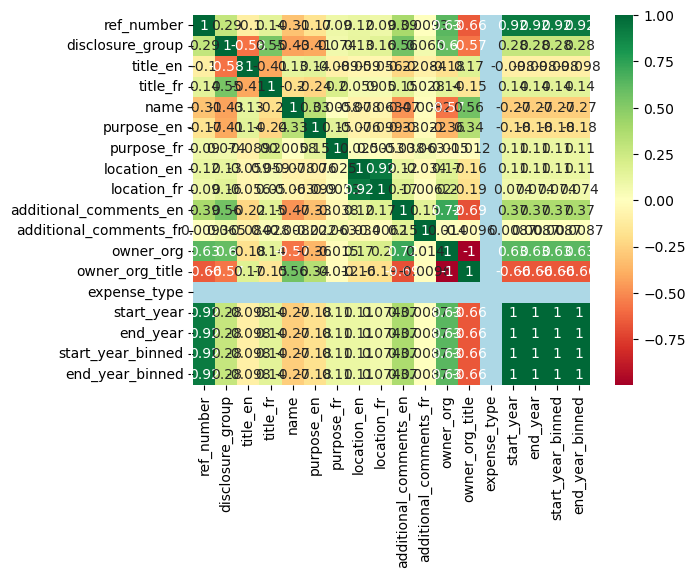

In [3]:
print(combined_data['expense_type'])
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white

sns.heatmap(combined_data[:1000].corr(), annot=True, cmap=color)
plt.show()

This data is pretty messy, but we can still pull some insights to help with with feature reduction. We can see that the English and French versions of the columns are equivalent, meaning that we can drop one of these columns and keep the other without losing any significant pattern finding potential. We also see that the binned versions of start_year and end_year are essentially the same as their non-binned counterparts. We will drop these as well. The expense type has to do with wich table the entry originally came from. This has no relation with the other attributes at all which has caused an error making it blank on the heatmap. For this reason, it will be removed. The last insight is the reference number. Since there reference number is essentially random and has no bearing on the other data, we will remove it as a feature since there are no meaningful patterns we can extract from it's relationships with others.

In [4]:
combined_data.drop(['ref_number', 'title_fr', 'purpose_fr', 'location_fr', 'additional_comments_fr',
                   'start_year_binned', 'end_year_binned', 'expense_type'], axis=1, inplace=True)

##### Feature Selection With Heatmap: Second Round

Now that we've pruned some of the clearly redundant features, our heatmap should be a little cleaner and allow us to more easily look for complex relationships. In this round of feature selection we will be looking for columns and how they relate to multiple others and not just redundancies.

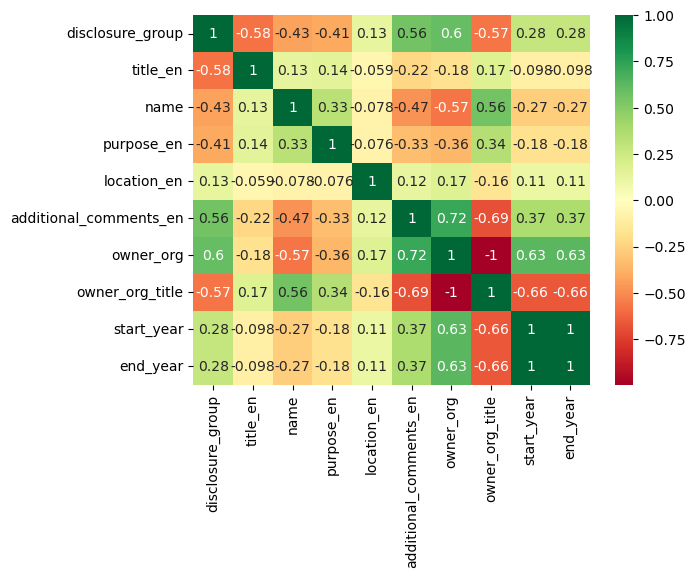

In [5]:
sns.heatmap(combined_data[:1000].corr(), annot=True, cmap=color)
plt.show()

From this second heatmap we can more clearly see the relationships between the columns. We can see that the location_en column doesn't have any strong relationships with any other column, so we will drop it since it won't help much with our clustering and susequent prediction tasks. We can drop title_en as well since the only strong relationship it has is a negative one with disclosure group. We will also drop name and purpose_en because they have mostly negative or weak relationships.

In [6]:
combined_data.drop(['location_en', 'purpose_en', 'name', 'title_en'], axis=1, inplace=True)

##### Clustering Using K-Means Centroid-Based Approach

We'll start off by using the elbow method to find the optimal parameter for K-Means. We will compare our clustering approaches using plots of the owner_org and owner_org_title columns since they are negatively correlated with each other and should be even dispersed on a graph unlike disclosure group wich have far fewer unique values.

c:\Users\dom17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dom17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dom17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dom17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

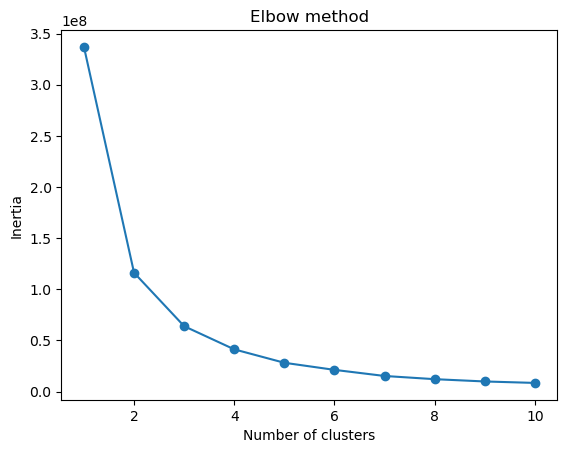

In [7]:
from sklearn.cluster import KMeans

data = list(zip(combined_data['owner_org'], combined_data['owner_org_title']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

Here we can see that the optimal value for k is 2. This is what we will use for our clustering.

c:\Users\dom17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


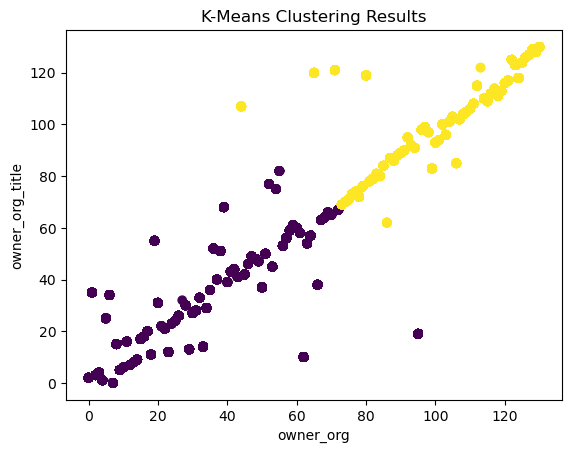

In [8]:
data = list(zip(combined_data['owner_org'], combined_data['owner_org_title']))

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data)

plt.scatter(combined_data['owner_org'], combined_data['owner_org_title'], c=kmeans.labels_)
plt.title('K-Means Clustering Results')
plt.xlabel('owner_org')
plt.ylabel('owner_org_title')
plt.show() 



##### Clustering Using DBSCAN Density-Based Approach

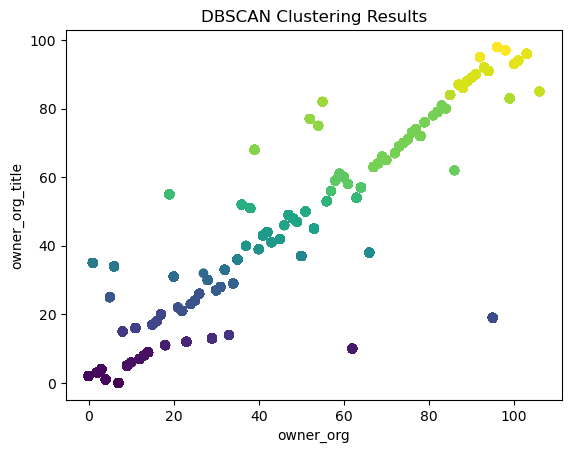

In [9]:
from sklearn.cluster import DBSCAN

data = list(zip(combined_data['owner_org'][:100000], combined_data['owner_org_title'][:100000]))

db = DBSCAN(eps=3, min_samples=5).fit(data)

plt.scatter(combined_data['owner_org'][:100000], combined_data['owner_org_title'][:100000], c=db.labels_)
plt.title('DBSCAN Clustering Results')
plt.xlabel('owner_org')
plt.ylabel('owner_org_title')
plt.show() 

##### Discussion of Clustering Approaches

The K-Means clustering was more efficient and was able to use all of the data samples to find clusters. It found two clusters in the data, effectively cutting it in half roughly in the vertical middle. The DBSCAN clustering algorithm found four or more distinct clusters occupying different ranges from the top to the bottom of the graph. I think the clusters produced by DBSCAN are much more interesting and would be a much better option to use for exploring patterns and finding trends. For these reasons, I believe that while DBSCAN wasn't able to handle the amount of data as well, it is the better clustering method for this dataset.

#### Decision Tree Analysis: Sean Kuehl

Based on the heatmap we produced in round two(see above) it looks like the owner_org column has several other features with fairly strong correlations. For this reason, we will make a decision tree classifier to try and predict this column.

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

#split the data into target and feature subsets


target = combined_data['owner_org']
feature = combined_data.drop(['owner_org'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(max_depth=5)  #limit the tree to a depth of 5 to ensure legibility

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.695955581753532


[Text(0.5491071428571429, 0.9166666666666666, 'x[2] <= 51.5\ngini = 0.901\nsamples = 122711\nvalue = [1162, 1158, 2126, 965, 431, 64, 296, 84, 1068, 764\n21, 113, 116, 2565, 417, 468, 138, 197, 75, 1724\n320, 14, 800, 244, 22, 43, 363, 1, 72, 4073, 314\n418, 1152, 159, 116, 228, 34709, 43, 1489, 4484, 44\n1286, 214, 93, 21, 10999, 14, 520, 1392, 30, 5422\n922, 89, 272, 15, 13, 1032, 151, 3907, 158, 211\n991, 216, 136, 707, 29, 771, 95, 116, 36, 14, 64\n53, 492, 32, 2600, 2420, 210, 100, 277, 99, 18, 95\n4, 32, 84, 9, 186, 77, 87, 71, 48, 24, 246, 2010\n3609, 884, 485, 24, 1437, 129, 71, 114, 184, 728\n1285, 19, 112, 466, 44, 111, 1668, 38, 2, 46, 240\n269, 3, 477, 282, 278, 210, 668, 2290, 228, 117\n2323, 275, 276, 1032, 17]'),
 Text(0.36607142857142855, 0.75, 'x[2] <= 41.5\ngini = 0.91\nsamples = 47903\nvalue = [1162, 1158, 2126, 965, 431, 64, 296, 84, 1068, 764\n21, 113, 116, 2565, 417, 468, 138, 197, 75, 0, 320\n14, 800, 244, 22, 43, 363, 1, 72, 4073, 314, 418\n1152, 159, 116, 228, 

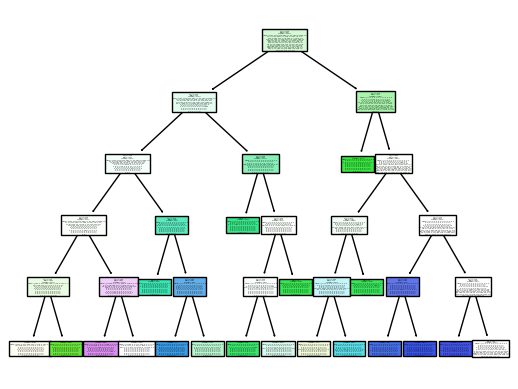

In [11]:
tree.plot_tree(clf, filled=True)

This decision tree has been pruned to a max depth of 5 and achieves an accuracy of nearly 70%. While these nodes are not readable without zooming in, that is largely due to the long (amounts of) numbers used as part of the decision rules which causes the cells to be larger and the visaulization software to zoom out more. For this reason the tree's rules are only legible without zooming in at extremely low values, like 1 or 2. For these reasons, I have chosen the value 5. Even though this tree is not visually "legible" it is "expainable" at this depth. For reference to help explain this choice, please see below where the same process is performed with a max depth of 1.

[Text(0.5, 0.75, 'x[2] <= 51.5\ngini = 0.901\nsamples = 122711\nvalue = [1162, 1158, 2126, 965, 431, 64, 296, 84, 1068, 764\n21, 113, 116, 2565, 417, 468, 138, 197, 75, 1724\n320, 14, 800, 244, 22, 43, 363, 1, 72, 4073, 314\n418, 1152, 159, 116, 228, 34709, 43, 1489, 4484, 44\n1286, 214, 93, 21, 10999, 14, 520, 1392, 30, 5422\n922, 89, 272, 15, 13, 1032, 151, 3907, 158, 211\n991, 216, 136, 707, 29, 771, 95, 116, 36, 14, 64\n53, 492, 32, 2600, 2420, 210, 100, 277, 99, 18, 95\n4, 32, 84, 9, 186, 77, 87, 71, 48, 24, 246, 2010\n3609, 884, 485, 24, 1437, 129, 71, 114, 184, 728\n1285, 19, 112, 466, 44, 111, 1668, 38, 2, 46, 240\n269, 3, 477, 282, 278, 210, 668, 2290, 228, 117\n2323, 275, 276, 1032, 17]'),
 Text(0.25, 0.25, 'gini = 0.91\nsamples = 47903\nvalue = [1162, 1158, 2126, 965, 431, 64, 296, 84, 1068, 764\n21, 113, 116, 2565, 417, 468, 138, 197, 75, 0, 320\n14, 800, 244, 22, 43, 363, 1, 72, 4073, 314, 418\n1152, 159, 116, 228, 0, 43, 1489, 0, 44, 1286, 214\n93, 0, 10999, 14, 520, 1392

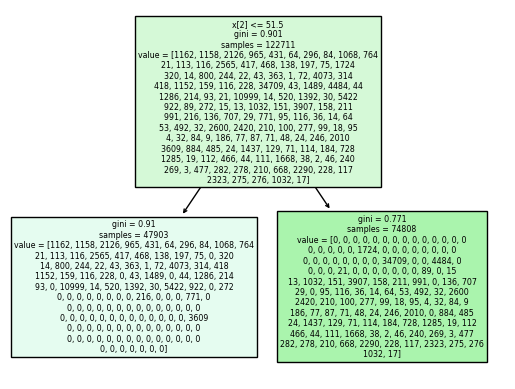

In [12]:
target = combined_data['owner_org']
feature = combined_data.drop(['owner_org'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(max_depth=1)  #limit the tree to a depth of 1 to try and make the overly long nodes legible

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

tree.plot_tree(clf, filled=True)

#### Association Rules: Dominic Pham

In this section, we will focus on association rules to analyze the relationship between items in the dataset. These associations can provide insights into how different items are related to each other, which can be useful for decision-making and further analysis.

The following steps are applied:

- Generate frequency counts of relevant items
- Treemap visualization of frequency counts of relevant items, 
- Create association rules using the Apriori algorithm. 
- Sorted rules by support, confidence, and lift, and thresholds 
- Identify interesting rules.

In [13]:
import squarify
from mlxtend.frequent_patterns import apriori, association_rules

In [14]:
combined_data

,disclosure_group,additional_comments_en,owner_org,owner_org_title,start_year,end_year
0,3,4634,7,0,2020,2020
1,3,4634,7,0,2020,2020
2,3,4634,7,0,2020,2020
3,3,4634,7,0,2020,2020
4,3,4634,7,0,2020,2020
...,...,...,...,...,...,...
175553,3,4634,128,129,2022,2022
175554,3,4634,128,129,2023,2023
175555,3,4634,128,129,2023,2023
175556,3,4634,128,129,2023,2023


##### Frequency Count of Relevant Items 

For the frequency count of relevant items, we will take a look at frequency counts between disclosure groups and organizations. With the frequency count of these items, we will then visualize the frequency count using a tree map. For relevant items, we decided to take a look at the disclosure groups and the organizations because we wanted to analyze how frequently different organizations are associated with various disclosure groups. This analysis will help us identify patterns or trends in organizational roles related to disclosures, providing insights into how certain roles may relate to ministerial travel and hospitality expenses.

In [15]:
frequency_counts = pd.crosstab(combined_data['disclosure_group'], combined_data['owner_org_title'])
frequency_counts['total'] = frequency_counts.sum(axis=1)
frequency_counts

owner_org_title,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,total
disclosure_group,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,0,0,856,506,0,0,0,0,130,0,...,0,411,0,278,663,0,227,367,0,40465
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,127,614,793,2532,1377,1107,27,168,3536,590,...,2,2851,166,676,2621,382,1233,40,30,134507
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,245


##### Tree Map Visualization of Frequency Count of Relevant Items 
The tree map visualization will allow us to represent these frequencies highlighting the relationships between disclosure groups and organization owner titles. Thedifferent organization owner titles are hot-one encoded in order to prepare it for association mining in ths phase, however from the previous phase the encoded title to the original title of those shown in the treemap are as such:

0: Accessibility Standards Canada | Normes d’accessibilité Canada

1: Administrative Tribunals Support Service of Canada | Service canadien d'appui aux tribunaux administratifs

2: Agriculture and Agri-Food Canada | Agriculture et Agroalimentaire Canada

3: Atlantic Canada Opportunities Agency | Agence de promotion économique du Canada atlantique

4: Atomic Energy of Canada Limited | Énergie atomique du Canada, Limitée

5: Canada Border Services Agency | Agence des services frontaliers du Canada

6: Canada Council for the Arts | Conseil des arts du Canada

7: Canada Deposit Insurance Corporation | Société d'assurance-dépôts du Canada

c:\Users\dom17\anaconda3\Lib\site-packages\squarify\__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap()


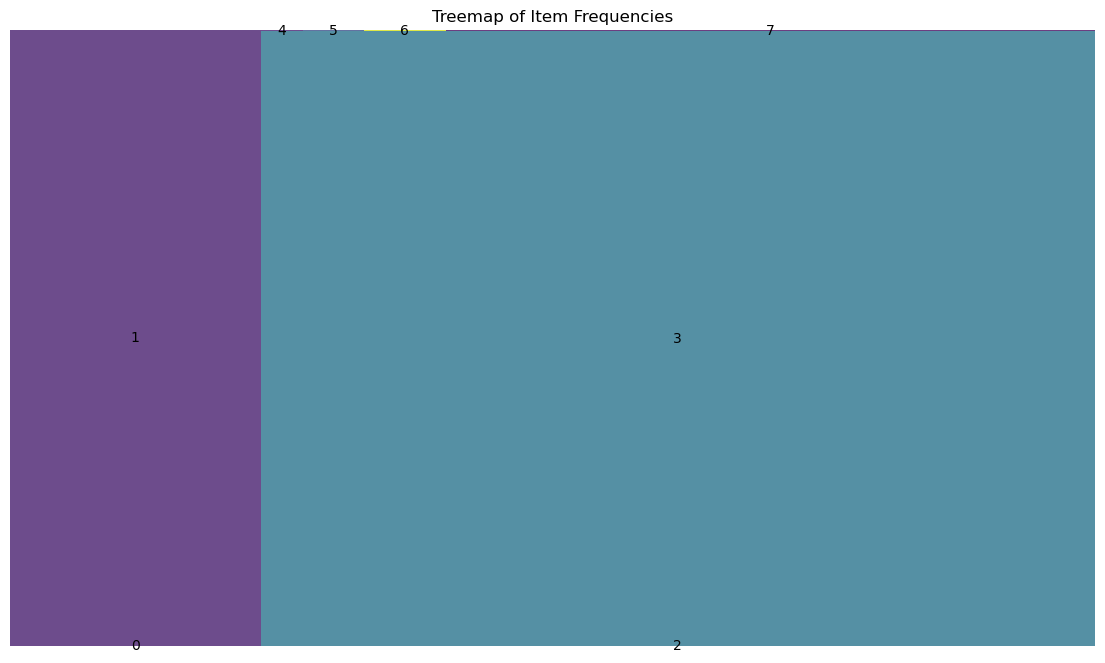

In [16]:
sizes = frequency_counts['total']
labels = frequency_counts.index

plt.figure(figsize=(14, 8))
squarify.plot(sizes=sizes,label=labels,alpha=0.8)
plt.title('Treemap of Item Frequencies')
plt.axis('off')
plt.show()

##### Creating Association Rules

In [17]:
# Convert the dataframe to a one-hot encoded format
one_hot = pd.get_dummies(combined_data[['disclosure_group', 'owner_org_title']].astype(str))

# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort the rules by support, confidence, and lift
rules = rules.sort_values(by=['support', 'confidence', 'lift'], ascending=False)

# Set thersholds for support, confidence, and lift
support_threshold = 0.01
confidence_threshold = 0.6
lift_threshold = 1.0

# Filter the rules based on the thresholds
interesting_rules = rules[(rules['support'] >= support_threshold) &
                          (rules['confidence'] >= confidence_threshold) &
                          (rules['lift'] >= lift_threshold)]


interesting_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(owner_org_title_52),(disclosure_group_3),0.282079,0.767287,0.235668,0.835467,1.088858,0.019232,1.414382,0.113671
24,(owner_org_title_68),(disclosure_group_3),0.036879,0.767287,0.032698,0.886620,1.155526,0.004401,2.052507,0.139747
18,(owner_org_title_19),(disclosure_group_3),0.029538,0.767287,0.029538,1.000000,1.303293,0.006874,inf,0.239796
17,(owner_org_title_13),(disclosure_group_3),0.033388,0.767287,0.028317,0.848112,1.105338,0.002699,1.532134,0.098591
27,(owner_org_title_71),(disclosure_group_3),0.021032,0.767287,0.021032,1.000000,1.303293,0.004894,inf,0.237712
29,(owner_org_title_8),(disclosure_group_3),0.020912,0.767287,0.020171,0.964539,1.257077,0.004125,6.562498,0.208872
5,(owner_org_title_59),(disclosure_group_1),0.032025,0.230830,0.019287,0.602244,2.609036,0.011894,1.933775,0.637120
13,(owner_org_title_123),(disclosure_group_3),0.018608,0.767287,0.016263,0.874004,1.139083,0.001986,1.846980,0.124416
14,(owner_org_title_126),(disclosure_group_3),0.018733,0.767287,0.014951,0.798112,1.040174,0.000577,1.152682,0.039359
20,(owner_org_title_3),(disclosure_group_3),0.017330,0.767287,0.014444,0.833443,1.086220,0.001146,1.397196,0.080776


##### Selection of Thresholds 

For the support threshold, we chose to set it to 0.01 so that when an itemset appears at least 1% of the dataset to have that considered because this will be a good threshold to maintain relevancy in the itemset and not include any item sets that are extremely rare that might not add any benefit for analysis and could potentially add noise.

For the confidence threshold, we chose to set it to 0.6 so that when there is at least a 60% chance that for a consequent to occur when the antecedent is present. This will indicate a strong association between the consequent and the antecedent and will ensure that the rules are reliable. This will add more value to our analysis when the confidence level is at least 60%. 

For the lift threshold, we chose to set it to 1.0 so that it is expected by 1 times that items in the antecedent are to occur with items in the consequent over random chance. Setting it to this value will ensure that rules will provide a positive correlation between items.

#### Classification Analysis: Mason Ward

We're aiming to identify suspicious expenses based on the total amount of money spent on them, so the first thing we are doing is importing a csv from phase 1 that contains the expense totals.

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('phase1total.csv')


We are just re-cleaning it to ensure all empty values are removed.

In [19]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df['name'] = df['name'].fillna('Unknown')

missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

# Drop date columns
df = df.drop(['start_date', 'end_date'], axis=1)


Missing values after imputation:
 ref_number                0
disclosure_group          0
title_en                  0
title_fr                  0
name                      0
purpose_en                0
purpose_fr                0
start_date                0
end_date                  0
location_en               0
location_fr               0
total                     0
additional_comments_en    0
additional_comments_fr    0
owner_org                 0
owner_org_title           0
expense_type              0
dtype: int64


Next, we are going to use Naive Bayesian Classifier, K-Nearest Neighbour, and AdaBoost as our classification models. We are creating a field called high expense, which will identify expenses over $2000, which is being used as the target variable. We tried to create a method of identifying suspicious transactions, but too few were identified (only 46) for the training to be successful - it was never able to accurately predict suspicious transactions. Therefore, we pivoted to expensive transactions instead, which can still be investigated for suspicious activity.

In [20]:
import time
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Create a binary flag for suspicious expenses
df['high_expense'] = (df['total'] > 2000).astype(int)

# Separate features and target
X = df.drop(['total', 'high_expense'], axis=1)
y = df['high_expense']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_preprocessed = preprocessor.fit_transform(X)

# Sample a subset of the data
X_sample, _, y_sample, _ = train_test_split(X_preprocessed, y, test_size=0.8, random_state=42)

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Define classification models
models = {
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

First, we're checking to make sure an adequate amount of the dataset has been identified as high expenses, as training will be negatively impacted if there are too few.

In [21]:
count_of_ones = (y == 1).sum()

print(f"The number of entries set to 1 is: {count_of_ones}")

The number of entries set to 1 is: 37294


37000/175000 is a reasonable ratio, so we will begin training the models now.

In [22]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in models}

start_time = time.time()
for name, model in models.items():
    print(f'\n{name} Classification:')
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        model.fit(X_train_kf, y_train_kf)
        y_pred_kf = model.predict(X_test_kf)
        
        # Calculate metrics
        results[name]['accuracy'].append(accuracy_score(y_test_kf, y_pred_kf))
        results[name]['precision'].append(precision_score(y_test_kf, y_pred_kf))
        results[name]['recall'].append(recall_score(y_test_kf, y_pred_kf))
        results[name]['f1'].append(f1_score(y_test_kf, y_pred_kf))
        
        print(classification_report(y_test_kf, y_pred_kf))

end_time = time.time()

print(f"\nTotal Time Taken: {end_time - start_time:.2f} seconds")

# Print average metrics
for name, metrics in results.items():
    print(f'\n{name} Average Metrics:')
    print(f"Accuracy: {sum(metrics['accuracy']) / len(metrics['accuracy']):.2f}")
    print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.2f}")
    print(f"Recall: {sum(metrics['recall']) / len(metrics['recall']):.2f}")
    print(f"F1 Score: {sum(metrics['f1']) / len(metrics['f1']):.2f}")


Naive Bayes Classification:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4407
           1       0.80      0.06      0.11      1211

    accuracy                           0.79      5618
   macro avg       0.80      0.53      0.50      5618
weighted avg       0.80      0.79      0.72      5618

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4435
           1       0.85      0.07      0.13      1183

    accuracy                           0.80      5618
   macro avg       0.83      0.53      0.51      5618
weighted avg       0.81      0.80      0.73      5618

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4426
           1       0.83      0.06      0.11      1192

    accuracy                           0.80      5618
   macro avg       0.81      0.53      0.50      5618
weighted avg       0.80      0.80      0.72  

Final results:<br>
<br>
Naive Bayes: <br>
Accuracy: 0.80<br>
Precision: 0.81<br>
Recall: 0.06<br>
F1 Score: 0.11<br>
<br>
K-Nearest Neighbours: <br>
Accuracy: 0.81<br>
Precision: 0.59<br>
Recall: 0.35<br>
F1 Score: 0.44<br>
<br>
AdaBoost: <br>
Accuracy: 0.81<br>
Precision: 0.63<br>
Recall: 0.24<br>
F1 Score: 0.35<br>
<br>
Naives Bayes has the highest precision, but lowest recall and F1 score - makes fewer mistakes in positive predictions but fails to capture a large number of actual positives.<br>
AdaBoost has the highest accuracy and precision, but lower recall and F1 score than KNN - more conservative in predicting positives but misses more actual positives compared to KNN.<br>
KNN has balanced metrics, and is a good middle ground between capturing true positives and avoiding false positives.<br>
<br>
The purpose of predicting high expense items is so we can more easily identify cases where more money is being spent than needed. For that reason, we would prefer to have false positives over false negatives, which means we are valuing recall highly. <br>
Therefore, the best classification method to suit our needs is <b>K-Nearest Neighbours.